## Train a simple convnet on the Fashion MNIST dataset

In [1]:
import numpy as np
import pandas as pd
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense,Dropout,Activation,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.utils import np_utils
from keras.utils import np_utils
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [0]:
import numpy as np
import pandas as pd
import keras
from keras.utils import np_utils
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [2]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


### Find no.of samples are there in training and test datasets

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [0]:
""

### Find dimensions of an image in the dataset

In [5]:
print("Find the dimension",x_train.shape[1:3])

Find the dimension (28, 28)


### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [6]:
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)
y_train[2]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train = x_train/255
x_test = x_test/255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
xtrain=x_train.reshape(x_train.shape[0],28,28,1).astype('float32')
xtest=x_test.reshape(x_test.shape[0],28,28,1).astype('float32')

### Import the necessary layers from keras to build the model

In [0]:
from keras.models import Sequential
from keras.layers.core import Dense,Dropout,Activation,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [10]:
input_shape = (28,28,1)
num_classes = 10

model = Sequential() 
model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu')) 
model.add(Dense(num_classes, activation='softmax'))

In [0]:
# simple early stopping
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', verbose=1,patience=5)

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [12]:
input_shape = (28,28,1)
num_classes = 10

model = Sequential() 
model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=2 , padding='same'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu')) 
model.add(Dense(num_classes, activation='softmax'))



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [13]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
model.fit(xtrain, y_train,
          batch_size=32,
          epochs=10,
          verbose=1,
          validation_data=(xtest, y_test),callbacks=[es])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 24s 408us/step - loss: 0.3909 - acc: 0.8583 - val_loss: 0.3013 - val_acc: 0.8892
Epoch 2/10
60000/60000 [==============================] - 18s 304us/step - loss: 0.2535 - acc: 0.9067 - val_loss: 0.2426 - val_acc: 0.9087
Epoch 3/10
60000/60000 [==============================] - 18s 308us/step - loss: 0.2040 - acc: 0.9239 - val_loss: 0.2356 - val_acc: 0.9155
Epoch 4/10
60000/60000 [==============================] - 18s 307us/step - loss: 0.1698 - acc: 0.9364 - val_loss: 0.2357 - val_acc: 0.9160
Epoch 5/10
60000/60000 [==============================] - 18s 307us/step - loss: 0.1411 - acc: 0.9474 - val_loss: 0.2508 - val_acc: 0.9144
Epoch 6/10
60000/60000 [==============================] - 18s 308us/step - loss: 0.1184 - acc: 0.9551 - val_loss: 0.2391 - val_acc: 0.9242
Epoch 7/10
60000/60000

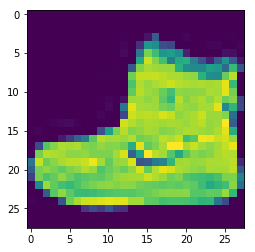

In [21]:
x_train[0].shape
plt.imshow(x_train[0])

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator
image_gen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True,rotation_range=90)

In [0]:
image_gen.fit(xtrain)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

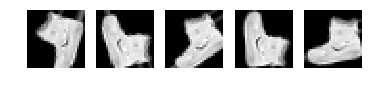

In [25]:
from matplotlib import pyplot as plt
gen = image_gen.flow(xtrain[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [28]:
history = model.fit_generator(image_gen.flow(xtrain,y_train),         
          epochs=5,
          verbose=1,
          validation_data=image_gen.flow(xtest, y_test),callbacks=[es])

Epoch 1/5
1875/1875 [==============================] - 31s 16ms/step - loss: 0.8539 - acc: 0.7348 - val_loss: 0.5396 - val_acc: 0.8070
Epoch 2/5
1875/1875 [==============================] - 31s 16ms/step - loss: 0.5035 - acc: 0.8181 - val_loss: 0.4654 - val_acc: 0.8318
Epoch 3/5
1875/1875 [==============================] - 31s 16ms/step - loss: 0.4404 - acc: 0.8421 - val_loss: 0.4178 - val_acc: 0.8484
Epoch 4/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.4046 - acc: 0.8527 - val_loss: 0.3910 - val_acc: 0.8584
Epoch 5/5
1875/1875 [==============================] - 31s 16ms/step - loss: 0.3786 - acc: 0.8624 - val_loss: 0.3737 - val_acc: 0.8668


###  Report the final train and validation accuracy

In [29]:
model.history.history['val_acc'][-1]

0.8668

In [30]:
model.history.history['acc'][-1]

0.8623833333333333

## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
from keras.preprocessing.image import ImageDataGenerator

### **Load CIFAR10 dataset**

In [0]:
from keras.datasets import cifar10

In [33]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
image_gen2 = ImageDataGenerator(rotation_range=90,horizontal_flip=True, vertical_flip=True,width_shift_range=0.2, height_shift_range=0.3)

In [35]:
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)
y_train[2]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [0]:
x_train = x_train/255
x_test = x_test/255

In [0]:
xtrain=x_train.reshape(x_train.shape[0],32,32,3).astype('float32')
xtest=x_test.reshape(x_test.shape[0],32,32,3).astype('float32')

### **Prepare/fit the generator.**

In [0]:
image_gen2.fit(x_train)

In [0]:
input_shape = (32,32,3)
num_classes = 10

model2 = Sequential() 
model2.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=input_shape))
model2.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
model2.add(MaxPooling2D(pool_size=2 , padding='same'))
model2.add(Dropout(0.2))
model2.add(Flatten())
model2.add(Dense(128, activation='relu')) 
model2.add(Dense(num_classes, activation='softmax'))

In [0]:
model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [0]:
# simple early stopping
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', verbose=1,patience=5)

In [43]:
history = model2.fit_generator(image_gen.flow(xtrain,y_train),         
          epochs=10,
          verbose=1,
          validation_data=image_gen.flow(xtest, y_test),callbacks=[es])

Epoch 1/10
1563/1563 [==============================] - 42s 27ms/step - loss: 1.6076 - acc: 0.4288 - val_loss: 1.4043 - val_acc: 0.5037
Epoch 2/10
1563/1563 [==============================] - 42s 27ms/step - loss: 1.3778 - acc: 0.5110 - val_loss: 1.3296 - val_acc: 0.5282
Epoch 3/10
1563/1563 [==============================] - 42s 27ms/step - loss: 1.2810 - acc: 0.5466 - val_loss: 1.2543 - val_acc: 0.5510
Epoch 4/10
1563/1563 [==============================] - 42s 27ms/step - loss: 1.2287 - acc: 0.5634 - val_loss: 1.1984 - val_acc: 0.5752
Epoch 5/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.1848 - acc: 0.5821 - val_loss: 1.1801 - val_acc: 0.5766
Epoch 6/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.1569 - acc: 0.5908 - val_loss: 1.1874 - val_acc: 0.5825
Epoch 7/10
1563/1563 [==============================] - 41s 27ms/step - loss: 1.1271 - acc: 0.6012 - val_loss: 1.1503 - val_acc: 0.5897
Epoch 8/10
1563/1563 [==========================

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


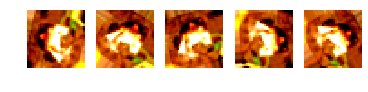

In [44]:
from matplotlib import pyplot as plt
gen = image_gen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='viridis')
    plt.plot()
plt.show()